In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

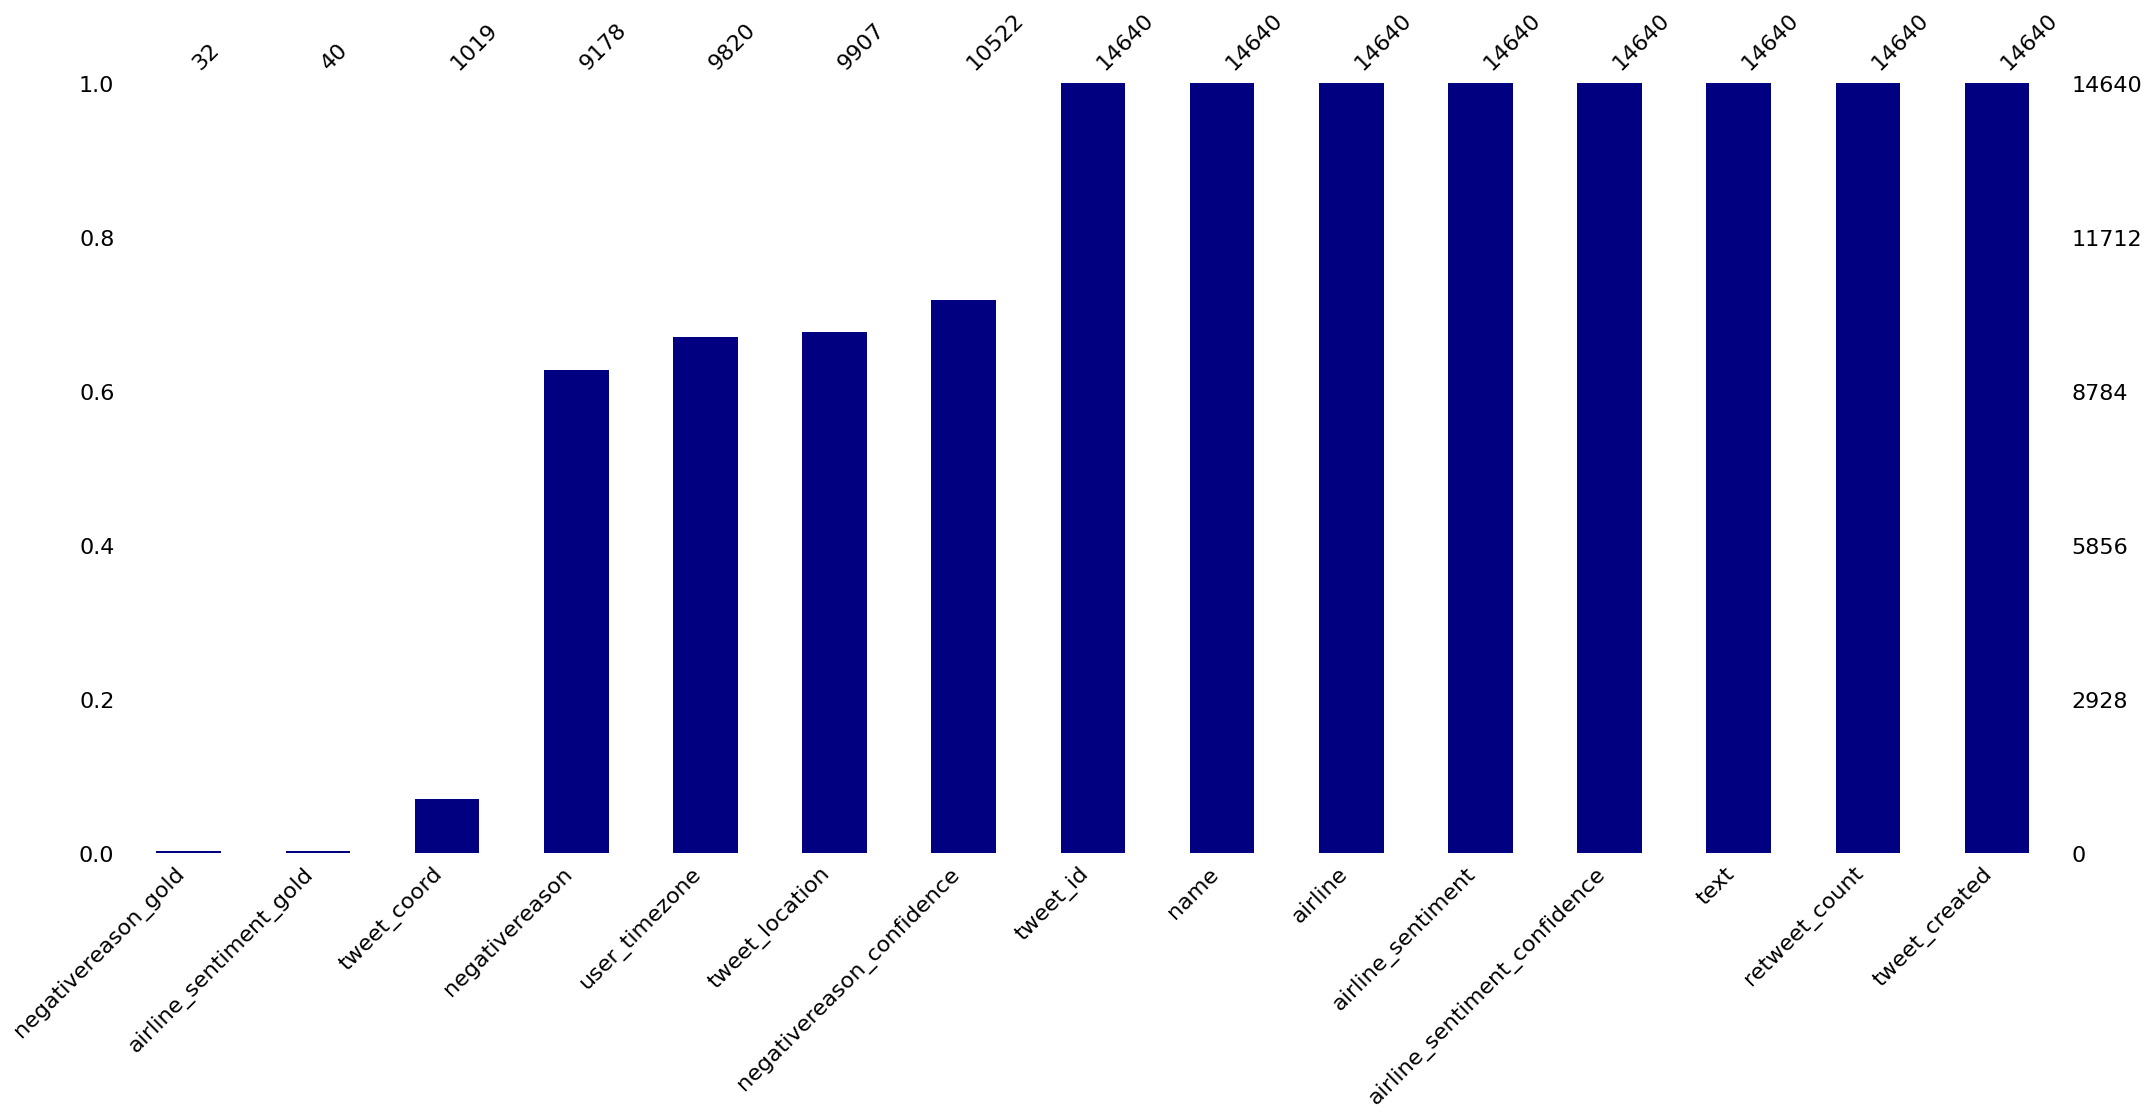

In [3]:
mns.bar(df,color='navy',sort = 'ascending')

In [4]:
fig = px.histogram(x = df['negativereason'],text_auto=True, color=df['negativereason'])
fig.update_layout(title='Negative Reasons encoutered in the Data')
fig.show()

In [5]:
fig = px.histogram(x = df['airline'],text_auto=True, color=df['negativereason'],barmode='group')
fig.update_layout(title='Airline with highest Negative Customer Service Issue')
fig.show()

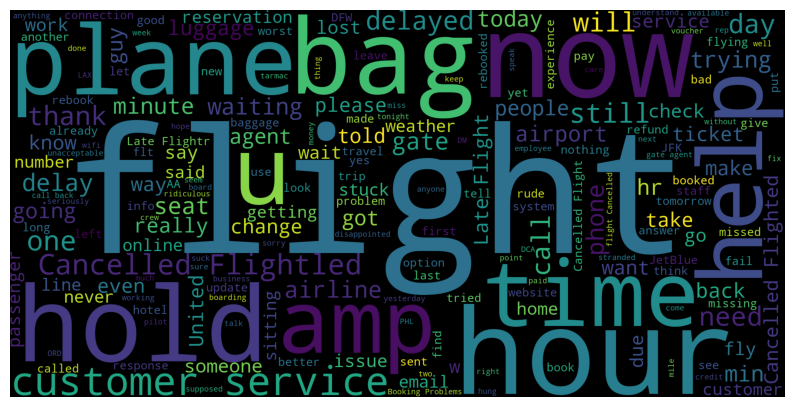

In [6]:
new_data = df[df['airline_sentiment']=='negative']
words = " ".join(new_data['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords=STOPWORDS, background_color = 'black',width = 2000, height=1000).generate(clw)
pit.figure(1, figsize=(10,10))
pit.imshow(wc)
pit.axis('off')
pit.show()

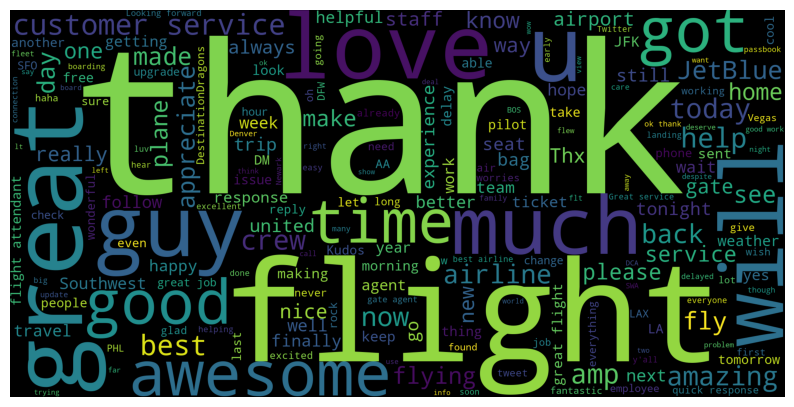

In [7]:


new_data = df[df['airline_sentiment']=='positive']
words = " ".join(new_data['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords=STOPWORDS, background_color = 'black',width = 2000, height=1000).generate(clw)
pit.figure(1, figsize=(10,10))
pit.imshow(wc)
pit.axis('off')
pit.show()


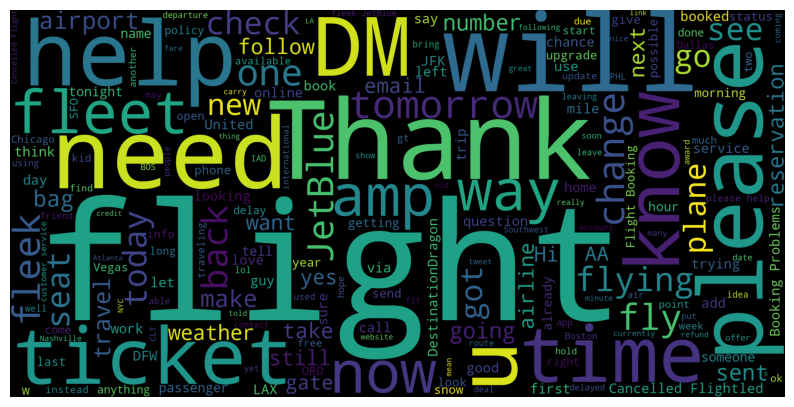

In [8]:
new_data = df[df['airline_sentiment']=='neutral']
words = " ".join(new_data['text'])
clw = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc = WordCloud(stopwords=STOPWORDS, background_color = 'black',width = 2000, height=1000).generate(clw)
pit.figure(1, figsize=(10,10))
pit.imshow(wc)
pit.axis('off')
pit.show()

In [9]:
text_cleaning_re = "@\S+|https?:\S+http?:\s|[^A-Za-z0-9]+"
def preprocess(x, stem = False):
    x = re.sub(text_cleaning_re, " ",str(x).lower()).strip()
    tokens = []
    for token in x.split():
            if token not in stop_words:
              
                 if stem:
                     tokens.append(SnowballStemmer.stem(token))
                 else:
                      tokens.append(token)
    return " ".join(tokens)
df['text'] = df['text'].apply(lambda x: preprocess(x))
    

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\hp\AppData\Local\Temp\ipykernel_1504\2707722799.py:1: SyntaxWarning:

invalid escape sequence '\S'



In [10]:
df.text

0                                            dhepburn said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving 20 minutes late flight warnings commun...
14637          please bring american airlines blackberry10
14638    money change flight answer phones suggestions ...
14639    8 ppl need 2 know many seats next flight plz p...
Name: text, Length: 14640, dtype: object

In [11]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample
df_neg = df[df['airline_sentiment']=='negative']
df_pos = df[df['airline_sentiment']=='positive']
df_neu = df[df['airline_sentiment']=='neutral']
df_pos_sam = resample(df_pos, n_samples=9178)
df_neu_sam = resample(df_neu, n_samples=9178)
df = pd.concat([df_pos_sam,df_neu_sam,df_neg])
df = df.sample(frac=1)
df['airline_sentiment'].value_counts()
##Balancing the values before we start classification
            

airline_sentiment
neutral     9178
positive    9178
negative    9178
Name: count, dtype: int64

In [13]:
from sklearn.pipeline import Pipeline
clf1 = Pipeline([('Vectorizer',CountVectorizer()),('TRansformer',TfidfTransformer()),('Model',MultinomialNB())])
clf2 = Pipeline([('Vectorizer',CountVectorizer()),('TRansformer',TfidfTransformer()),('Model',BernoulliNB())])
clf3 = Pipeline([('Vectorizer',CountVectorizer()),('TRansformer',TfidfTransformer()),('Model',MLPClassifier
(hidden_layer_sizes=(10,10)))])

In [14]:
x = df.text
y = df['airline_sentiment']
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=0.2)
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('TRansformer', TfidfTransformer()),
                ('Model', MultinomialNB())])

In [15]:
pred1 = clf1.predict(xtest)
from sklearn .metrics import classification_report,confusion_matrix,precision_score, recall_score,accuracy_score,f1_score
print(classification_report(ytest,pred1))


              precision    recall  f1-score   support

    negative       0.80      0.85      0.82      1777
     neutral       0.85      0.77      0.80      1881
    positive       0.86      0.89      0.88      1849

    accuracy                           0.83      5507
   macro avg       0.83      0.83      0.83      5507
weighted avg       0.84      0.83      0.83      5507



<Axes: >

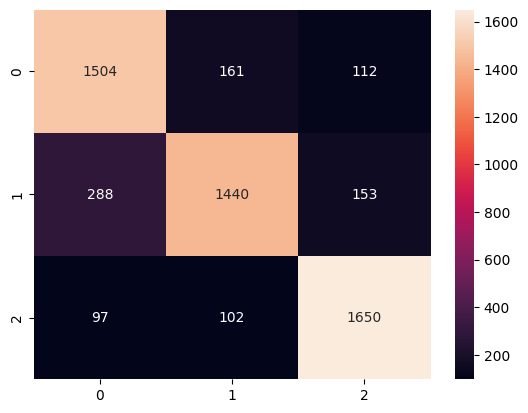

In [16]:
cm1 = confusion_matrix(ytest,pred1)
sns.heatmap(cm1, annot=True, fmt = '0.5g')